In [1]:
from Whispi.Backtest.Strategies.strategy_meta import StrategyMeta

class BigJumpAndAfterGrowth(StrategyMeta):
    params = (
        ('jump_size', 2),
        ('period_after_jump', 30),
    )
        
    def buy_signal(self):
        return self.data.close[0] >  self.data.close[-1]*(1 + self.params.jump_size/100)

    def close_signal(self):
        return len(self) >= (self.bar_executed + self.params.period_after_jump)
    
    def notify_order(self, order):
        if order.status == order.Completed:
            self.bar_executed = len(self)

        if not order.alive():
            self.order = None 
            
    def next(self):
        if self.order:
            return  # pending order execution

        if not self.position:  # not in the market
            if self.buy_signal():
                self.order = self.buy()

        else:  # in the market

            if self.close_signal():
                self.close()  # stop met - get out

C:\ProgramData\Anaconda3\envs\TestLibraries\lib\site-packages\finrudatasets\Source\ohlc.py:159: UserWarning: MoexInfo currency set to RUB for FXUS
  warnings.warn("MoexInfo currency set to RUB for " +self.ticket)


<IPython.core.display.Javascript object>


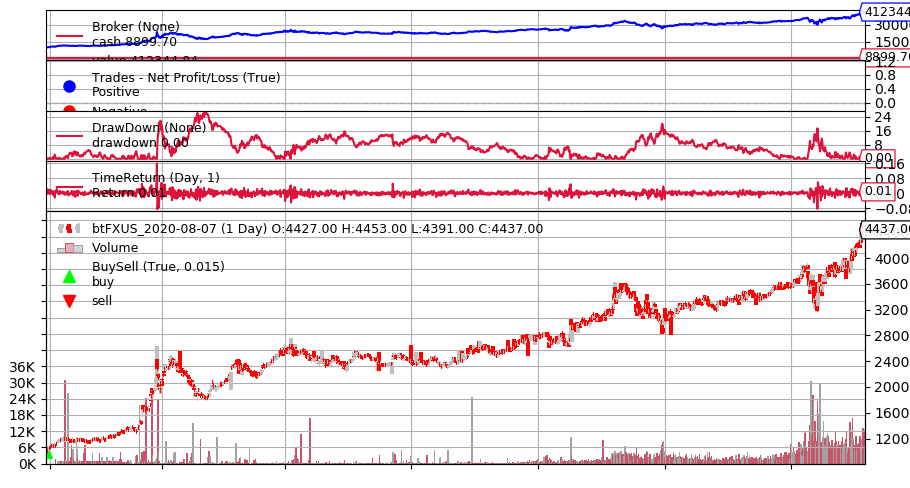

                                       0
sharperatio                     0.562641
worst                         -0.0902844
best                            0.848765
nochange                               0
negative                               1
positive                               7
stddev                          0.263129
average                         0.218047
rnorm100                         24.4025
rnorm                           0.244025
ravg                         0.000866477
rtot                             1.41669
2020                            0.242134
2019                            0.149565
2018                            0.123855
2017                            0.130859
2016                          -0.0902844
2015                            0.301297
2014                            0.848765
2013                           0.0381887
trades                                 0
sqn                                    0
period_after_jump                     30
jump_size       

In [2]:
from Whispi.Backtest.Runners.bt_case_run import *

k = BtRunCase(strategy=BigJumpAndAfterGrowth, ticket='FXUS')

In [3]:
from Whispi.Backtest.Runners.bt_strategy_opt import *

k = BtRunOpt(strategy=BigJumpAndAfterGrowth, ticket = 'FXUS',
             jump_size=range(1, 10, 1),
             period_after_jump = range(1, 90, 1)
             )

C:\ProgramData\Anaconda3\envs\TestLibraries\lib\site-packages\finrudatasets\Source\ohlc.py:159: UserWarning: MoexInfo currency set to RUB for FXUS
  warnings.warn("MoexInfo currency set to RUB for " +self.ticket)


                                       0                      538  \
m_sharperatio                     0.562641               0.562641   
m_rnorm100                         24.4025                24.4025   
m_rnorm                           0.244025               0.244025   
m_ravg                         0.000866477            0.000866477   
m_rtot                             1.41669                1.41669   
m_2020                            0.242134               0.242134   
m_2019                            0.149565               0.149565   
m_2018                            0.123855               0.123855   
m_2017                            0.130859               0.130859   
m_2016                          -0.0902844             -0.0902844   
m_2015                            0.301297               0.301297   
m_2014                            0.848765               0.848765   
m_2013                           0.0381887              0.0381887   
m_trades                          

In [4]:
display(k.data.iloc[0, :])

m_sharperatio                       0.562641
m_rnorm100                           24.4025
m_rnorm                             0.244025
m_ravg                           0.000866477
m_rtot                               1.41669
m_2020                              0.242134
m_2019                              0.149565
m_2018                              0.123855
m_2017                              0.130859
m_2016                            -0.0902844
m_2015                              0.301297
m_2014                              0.848765
m_2013                             0.0381887
m_trades                                   0
m_sqn                                      0
p_jump_size                                1
p_period_after_jump                        1
strategy               BigJumpAndAfterGrowth
ticket                                  FXUS
Name: 0, dtype: object

In [ ]:
from Whispi.Backtest.Runners.bt_market_strategy_opt import *
k4 = BtRunMarketStrategyOpt(strategy=BigJumpAndAfterGrowth, 
             jump_size=range(1, 5, 1),
             period_after_jump = range(1, 60, 3))

In [ ]:
k4.get_best()